## MMDetection

## Initialize the model with the checkpoint and config

In [12]:
from mmdet.apis import init_detector, inference_detector

config_file = 'configs_mmdet3.3/rtmdet/rtmdet_tiny_8xb32_300e_coco.py'
# download the checkpoint using `mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest checkpoints/`
checkpoint_file = 'checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

model = init_detector(config_file, checkpoint_file, device='cpu')

Loads checkpoint by local backend from path: checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



/mnt/data/home/jinyudong/programs/miniconda3/envs/lab06/lib/python3.8/site-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoi

## Inference with the image provided.

In [13]:
img_path = 'pictures/det.jpg'
result = inference_detector(model, img_path)

/mnt/data/home/jinyudong/programs/miniconda3/envs/lab06/lib/python3.8/site-packages/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/mnt/data/home/jinyudong/programs/miniconda3/envs/lab06/lib/python3.8/site-packages/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


## Show the results.

/mnt/data/home/jinyudong/programs/miniconda3/envs/lab06/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


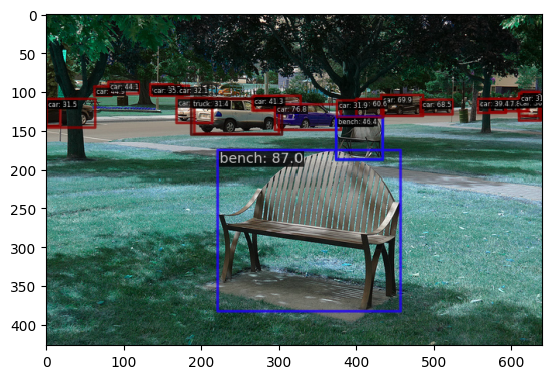

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import mmcv
from mmdet.registry import VISUALIZERS

visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

img = cv2.imread(img_path)
img = mmcv.imconvert(img, 'bgr', 'rgb')
visualizer.add_datasample(
    name='result',
    image=img,
    data_sample=result,
    draw_gt=False,
    pred_score_thr=0.3,
    show=False
)

img = visualizer.get_image()  
img = mmcv.imconvert(img, 'bgr', 'rgb')


plt.imshow(img)
plt.show()

## Your turn

You should use your image and do the inference.

You should also provide another segmentation model results with this image.

# Remember to only submit your notebook!!!

# Do not submit the data and the checkpoints!!!